In [1]:
import numpy as np
import math, random

from math import sqrt, pi, atan2, cos, sin

import matplotlib.pyplot as plt

from typing import List, Tuple

from shapely import affinity
from shapely.geometry import Polygon, Point, LinearRing, LineString
from shapely.plotting import plot_polygon, plot_points, plot_line
from shapely.ops import transform

Creating polygon

Model 1

In [2]:
a, b, x0, y0, R = 4.0, 4.0, 0.0, 0.0, 75.0
vertices = [(a*1.0, b*1.0), (-a*1.0, b*1.0), (-a*1.0, -b*1.0), (a*1.0, -b*1.0), (a*1.0, b*1.0)]
pplg = transform(lambda x, y, z=None: (x-x0, y-y0), LinearRing(vertices))

Solution

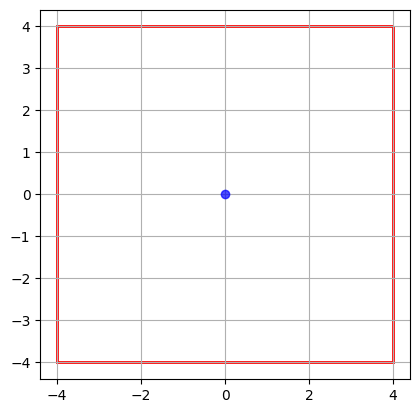

In [3]:
ppts = []
ppts.append(Point(pplg.coords[0][0], pplg.coords[0][1]))
for i in reversed(range(len(pplg.coords)-1)):
    ppts.append(Point(pplg.coords[i][0], pplg.coords[i][1]))
plg = LinearRing(ppts)

plot_line(plg, add_points=False, color=(1,0,0), alpha=1)
plot_points(Point(0.0, 0.0), color=(0,0,1), alpha=0.7)

plt.autoscale()
plt.show()

In [4]:
edg = []
trcpts = []

for i in range(len(plg.coords)-1):
    r = sqrt((plg.coords[i+1][0]-plg.coords[i][0])**2+(plg.coords[i+1][1]-plg.coords[i][1])**2)
    edg.append(((plg.coords[i+1][0]-plg.coords[i][0])/r, (plg.coords[i+1][1]-plg.coords[i][1])/r, r))

for i in range(len(plg.coords)-1):
    trcpts.append(Point(plg.coords[i][0]-edg[i][1]*R, plg.coords[i][1]+edg[i][0]*R))
    trcpts.append(Point(plg.coords[i+1][0]-edg[i][1]*R, plg.coords[i+1][1]+edg[i][0]*R))

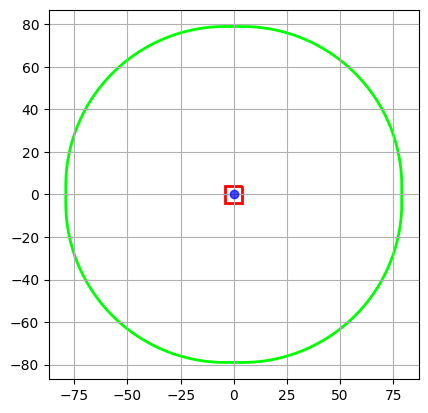

In [5]:
pts = []

lines = []
circles = []

for i in range(0, len(trcpts)-1, 2):
    n = 1000
    # line
    pt1 = trcpts[i]
    pt2 = trcpts[i+1]
    # line = []
    for j in range(n): 
        alpha = j / n
        x = (1-alpha)*pt1.x+alpha*pt2.x
        y = (1-alpha)*pt1.y+alpha*pt2.y
        # line.append((x, y))
        pts.append(Point(x, y))
    # lines.append(line)

    n = 10000
    # circle
    pt1 = trcpts[i+1]
    if i+2 == len(trcpts):
        pt2 = trcpts[0]
    else:
        pt2 = trcpts[i+2]
    angle1 = atan2(pt1.y-plg.coords[int((i+2)/2)][1], pt1.x-plg.coords[int((i+2)/2)][0])
    angle2 = atan2(pt2.y-plg.coords[int((i+2)/2)][1], pt2.x-plg.coords[int((i+2)/2)][0])
    if angle1 < 0.0 and angle2 > 0.0:
        angle2 -= 2.0*math.pi
    # circle = []
    for j in range(n): 
        alpha = j / n
        phi = (1-alpha)*angle1+alpha*angle2
        x = R*cos(phi)+plg.coords[int((i+2)/2)][0]
        y = R*sin(phi)+plg.coords[int((i+2)/2)][1]
        # circle.append((x, y))
        pts.append(Point(x, y))
    # circles.append(circle)

trc = LinearRing(pts)

plot_line(plg, add_points=False, color=(1,0,0), alpha=1)
plot_line(trc, add_points=False, color=(0,1,0), alpha=1)
plot_points(Point(0.0, 0.0), color=(0,0,1), alpha=0.7)

plt.rcParams["figure.figsize"] = [5.0, 5.00]
plt.autoscale()
plt.show()

In [6]:
# for line in lines:
#     plt.scatter(*zip(*line), s=0.01)

# for circle in circles:
#     plt.scatter(*zip(*circle), s=0.01)
    
# plt.rcParams["figure.figsize"] = [5.0, 5.00]
# plt.gca().set_aspect('equal')
# plt.show()

In [7]:
ln = LineString([(0.0, 0.0), (0.0, 100.0)])
x = []
y = []
n = 1000
for i in range(n):
    angle = i*360.0/n
    yval = affinity.rotate(trc, angle, origin=Point(0.0,0.0)).intersection(ln).y
    x.append(angle)
    y.append(yval)

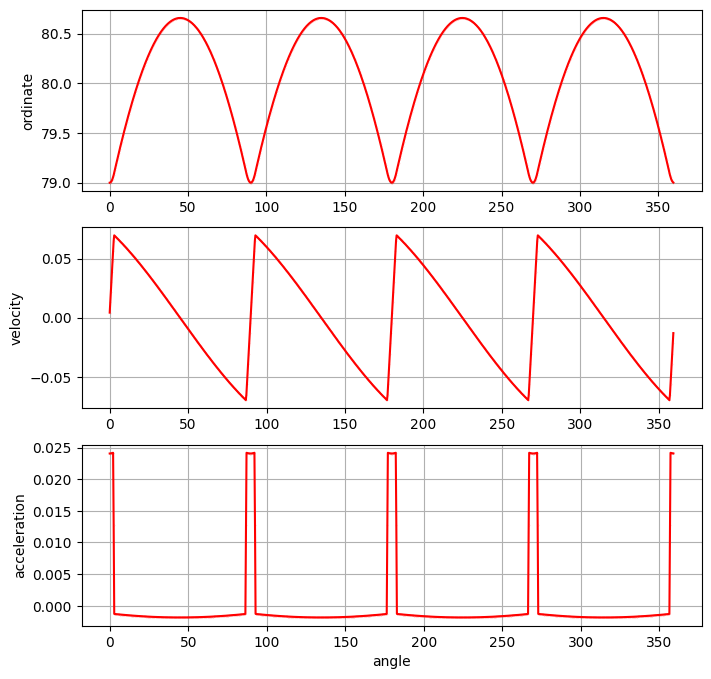

In [8]:
d1 = [(y2-y0)/(x2-x0) for x2, x0, y2, y0 in zip(x[1:], x, y[1:], y)]
d2 = [(y2-y0)/(x2-x0) for x2, x0, y2, y0 in zip(x[1:], x, d1[1:], d1)]

fig, axs = plt.subplots(3, 1)
fig.set_size_inches(8.0, 8.0)

axs[0].plot(x, y, marker='.', color="red", markersize=0.1)
axs[0].set_ylabel('ordinate')
axs[0].grid(True)

axs[1].plot(x[:-1], d1, marker='.', color="red", markersize=0.1)
axs[1].set_ylabel('velocity')
axs[1].grid(True)

axs[2].plot(x[:-2], d2, marker='.', color="red", markersize=0.1)
axs[2].set_xlabel('angle')
axs[2].set_ylabel('acceleration')
axs[2].grid(True)

plt.show()